# Tutorial 1:  Quantum Transport in a One-Dimensional Chain

## Introduction

**DPNEGF** is a Python package that integrates the Deep Learning Tight-Binding (**DeePTB**) approach with the Non-Equilibrium Green's Function (**NEGF**) method, 
establishing an efficient quantum transport simulation framework **DeePTB-NEGF** with first-principles accuracy. 

Based on the accurate electronic structure prediction in large-scale and complex systems, DPNEGF implements the
high-efficiency algorithm for high-throughput and large-scale quantum transport simulations in nanoelectronics.


### Learning Objectives

In this tutorial, you will learn 
1. how to load DeePTB model and plot band structure
2. how to calculate the transmission spectrum
   
For demonstration, we use a one-dimensional chain as an example.

### Requirements

DeePTB and DPNEGF installed. Detailed installation instructions can be found in README.


### *WARM UP*: A short introduction to NEGF

The **Non-Equilibrium Green’s Function (NEGF)** method is a widely used theoretical framework 
for studying quantum transport in nanoscale devices (molecular junctions, nanowires, CNT-FETs, etc.).  
It provides a rigorous way to compute current, density of states (DOS), and transmission by combining 
quantum mechanics with open boundary conditions.


#### 1. Partitioning the system
We divide the full system into three regions:
- **Left electrode (L)**: semi-infinite periodic lead
- **Device region (D)**: finite scattering region of interest
- **Right electrode (R)**: semi-infinite periodic lead

The Hamiltonian of the total system can be written schematically as:

$$
H = \begin{bmatrix}
H_L & V_{LD} & 0 \\
V_{DL} & H_D & V_{DR} \\
0 & V_{RD} & H_R
\end{bmatrix}
$$



#### 2. Green's function of the device
The central object is the **retarded Green’s function** of the device region:

$$
G^r(E) = \Big[ E S - H_D - \Sigma_L^r(E) - \Sigma_R^r(E) \Big]^{-1},
$$

where:
- $H_D$: device Hamiltonian,
- $\Sigma_{L/R}^r(E)$: electrode retarded self-energies, describing the coupling between device and semi-infinite electrodes.

The **self-energy** contains information about level broadening induced by the leads.



#### 3. Transmission function
The **transmission probability** at energy \(E\) is given by:

$$
T(E) = \mathrm{Tr} \big[ \Gamma_L(E) \, G^r(E) \, \Gamma_R(E) \, G^a(E) \big],
$$

with:
- $\Gamma_{L/R}(E) = i \big[ \Sigma_{L/R}^r(E) - \Sigma_{L/R}^a(E) \big]$
  (level broadening matrices),
- $G^a(E) = \big(G^r(E)\big)^\dagger$.



#### 4. Current (Landauer–Büttiker formula)
The current under bias voltage $V$ is obtained by integrating the transmission over energy:

$$
I(V) = \frac{2e}{h} \int dE \, T(E, V) \, \big[ f_L(E) - f_R(E) \big],
$$

where $f_{L/R}(E)$ are Fermi–Dirac distributions of the electrodes (shifted by bias).



#### 5. Key physical quantities
- **DOS**: density of states, related to the spectral function $A(E) = i(G^r - G^a)$.
- **LDOS**: local density of states, giving spatially resolved information inside the device.
- **Transmission spectrum**: energy-resolved measure of electron transport capability.


 
NEGF connects *microscopic Hamiltonians* (from first principles or tight-binding) with *observable transport quantities* (DOS,  current), incorporating the quantum effects naturally.
This makes it an essential tool for nanoelectronics and quantum device simulations.

In **DPNEGF**, the DeePTB model (either DeePTB-SK or DeePTB-E3) is employed to predict the electronic Hamiltonian with first-principles accuracy, after which the efficiently implemented NEGF method is used to calculate quantum transport properties.


## 1. Model loading and band plotting

In this section we will:
- Load a pretrained DeePTB model for a linear atomic chain,
- Plot the band structure (expected: a cosine-like dispersion for a single orbital 1D chain).


For demonstration, here we prepare a Slater-Koster Tight-Binding model with one single orbital at each atomic site.

Since there is a built-in baseline model covering the periodic table, for any target system of your interest, you can extract the corresponding model from this built-in baseline model. For more details about DeePTB and the built-in baseline model, please see [DeePTB-Tutorial 1: DeePTB-SK Baseline Model](https://deeptb.readthedocs.io/en/latest/quick_start/hands_on/tutorial1_base_sk.html).

Switch to the tutorial input directory. The examples and input files used in this tutorial are stored under `examples/atomic_chain_api/input_files`.

In [1]:
import os
from pathlib import Path
workdir='../../examples/atomic_chain_api/input_files'
wd = Path(workdir)
if not wd.is_dir():
    raise FileNotFoundError(f"Workdir '{wd}' not found. Please adjust 'workdir'.")
os.chdir(wd)
print("\t".join(sorted(os.listdir("."))))

chain.vasp	negf_chain_new.json	nnsk_C_new.json


The logging settings.

In [ ]:
from dpnegf.utils.loggers import set_log_handles
import logging
from pathlib import Path


results_path = '../band_plot'
log_path = os.path.join(results_path, 'log')
log_level = logging.INFO
set_log_handles(log_level, Path(log_path) if log_path else None)

Load model from file.

In [ ]:
from dptb.nn.build import build_model
import json
model =  "nnsk_C_new.json" # the model for demonstration
with open(model) as f:
    model_json = json.load(f)
model = build_model(model,
                    model_options= model_json['model_options'],
                    common_options=model_json['common_options'])

DPNEGF WARNING The model option atomic_radius in nnsk is not defined in input model_options, set to v1.


After the model is loaded, bands for specific structures can be plotted. 

Here we load the full system and split it into unit cell.

In [4]:
from ase.io import read
structure =  "chain.vasp" 
atoms = read(structure)
atoms

Atoms(symbols='C12', pbc=True, cell=[10.0, 10.0, 19.2])

In [5]:
uni_cell_atoms = atoms[0:1]
uni_cell_atoms.cell[2][2] = atoms.cell[2][2]/len(atoms)
uni_cell_atoms

Atoms(symbols='C', pbc=True, cell=[10.0, 10.0, 1.5999999999999999])

Because we only consider one orbital per atomic site, each atom contributes a single valence electron in the model.

As visible in the band diagram, the characteristic cosine-like dispersion of a one-dimensional chain appears.

DPNEGF ERROR   TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
DPNEGF WARNING Overwrite the r_max setting in the model with the r_max setting in the AtomicData_options: 3.0
DPNEGF WARNING This is very dangerous, please make sure you know what you are doing.
/opt/mamba/envs/dpnegf-dev/lib/python3.10/site-packages/torch/nested/__init__.py:107: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ../aten/src/ATen/NestedTensorImpl.cpp:178.)
  return torch._nested_tensor_from_tensor_list(ts, dtype, None, device, None)
DPNEGF WARNING eig_solver is not set, using default 'torch'.
DPNEGF INFO    KPOINTS  klist: 101 kpoints
DPNEGF INFO    The eigenvalues are already in data. will use them.
DPNEGF INFO    Calculating Fermi energy in the case of spin-degeneracy.
DPNEGF INFO    Fermi energy converged after 18 iterations.
DPNEGF INFO    q_cal: 0.9999982678381729, total_electrons: 1.0, di

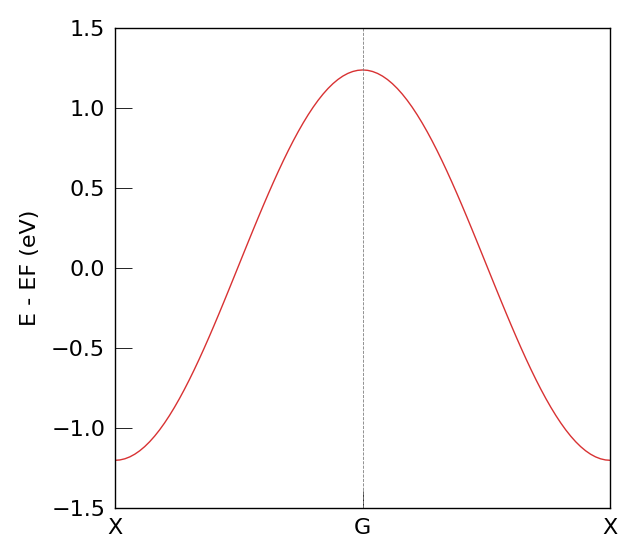

In [6]:
from dptb.postprocess.bandstructure.band import Band
import shutil

task_options = {
        "task": "band",
        "kline_type":"abacus",
        "kpath":[[0.0,   0.0,   0.5,   50],   
                 [0.0,   0.0,   0.0,   50],               
                 [0.0,   0.0,  -0.5,   1]
                ],
        "klabels":["X","G","X"],
        "emin":-1.5,
        "emax": 1.5,
        "nel_atom":{"C": 1} 

       }

if os.path.isdir(results_path):
    shutil.rmtree(results_path, ignore_errors=True) 

band = Band(model, results_path)
AtomicData_options = {"r_max": 3.0, "pbc": True}
band.get_bands(data = uni_cell_atoms, 
               kpath_kwargs = task_options,
               AtomicData_options = AtomicData_options)
band.band_plot(emin = task_options['emin'],
               emax = task_options['emax'])

## 2. NEGF calculation

After the model is loaded, we can calculate the transmission spectrum for the one-dimension chain.

A sample input file `negf_chain_new.json` is provided and can be loaded directly.

In [ ]:
try:
    from dpnegf.runner.NEGF import NEGF
except ImportError as e:
    raise ImportError("dpnegf not found. Please install firstly.") from e

negf_input_file =  "negf_chain_new.json" 
structure =  "chain.vasp" 
output = "../negf_output"  
if os.path.isdir(output):
    shutil.rmtree(output, ignore_errors=True)
os.makedirs(output, exist_ok=True)

with open(negf_input_file, "r") as f:
    negf_json = json.load(f)


DPNEGF INFO    Numba is available and JIT functions are compiled.


This input file contains:
- Energy range and step for the transmission calculation,
- Structural information that determines how to divide the system into device and electrode regions (left and right),
- Other important  parameters such as the number of valence electrons per element (the `nel_atom` field), which affects charge counting and Fermi level.


In [8]:
# Energy step and range for transmission calculation
negf_json['task_options']['espacing'], negf_json['task_options']['emin'], negf_json['task_options']['emax']

(0.02, -1.5, 1.5)

In [9]:
# Structural information for device and electrodes
negf_json['task_options']["stru_options"]

{'gamma_center': True,
 'time_reversal_symmetry': True,
 'nel_atom': {'C': 1.0},
 'kmesh': [1, 1, 1],
 'pbc': [False, False, False],
 'device': {'id': '4-8', 'sort': True},
 'lead_L': {'id': '0-4',
  'voltage': 0.0,
  'kmesh_lead_Ef': [1, 1, 20],
  'useBloch': False},
 'lead_R': {'id': '8-12',
  'voltage': 0.0,
  'kmesh_lead_Ef': [1, 1, 20],
  'useBloch': False}}

### Running NEGF from API

Note that the calculation of self-energy files may take some time.

In [10]:
if os.path.isdir(output):
    shutil.rmtree(output, ignore_errors=True)
os.makedirs(output)

negf = NEGF(
    model=model,
    AtomicData_options=negf_json['AtomicData_options'],
    structure=structure,
    results_path=output,  
    **negf_json['task_options']
)
   
negf.compute()

DPNEGF INFO    ------ k-point for NEGF -----
DPNEGF INFO    Gamma Center: True
DPNEGF INFO    Time Reversal: True
DPNEGF INFO    k-points Num: 1
DPNEGF INFO    k-points: [[0 0 0]]
DPNEGF INFO    k-points weights: [1.]
DPNEGF INFO    --------------------------------
DPNEGF WARNING AtomicData_options is extracted from input file. This may be not consistent with the model options. Please be careful and check the cutoffs.
DPNEGF INFO    The AtomicData_options is:
               {
                   "r_max": 3.0
               }
DPNEGF INFO    Lead principal layers translational equivalence error (on average): 1.732052e-10 (threshold: 1.000000e-05)
DPNEGF INFO    Lead principal layers translational equivalence error (on average): 1.732051e-10 (threshold: 1.000000e-05)
DPNEGF INFO    The coupling width of lead_L is 1.
DPNEGF INFO    The coupling width of lead_R is 1.
DPNEGF INFO    --------------------------------------------------------------------------------
DPNEGF INFO    The Hamiltonian

### Running NEGF from the Command Line

The NEGF calculation can also be executed via the command-line interface (CLI). This allows batch runs and straightforward integration with job scripts on HPC systems. 

See the example CLI commands below.


In [ ]:
# Command line for DPNEGF
! pwd
! [ -d "../negf_output_cli" ] && rm -r ../negf_output_cli
! dpnegf run negf_chain_new.json  -i nnsk_C_new.json -stu chain.vasp -o ../negf_output_cli

### Results Analysis

We can inspect the outputs of the NEGF run by loading the results file (`negf.out.pth`). The output  contains:
- `T_avg`: the total transmission as a function of energy,
- `T_k`: k-point resolved transmission (if k-sampling is used),
- `DOS`: density of states on the energy grid,
- `LDOS`: local density of states defined for each atomic site.


In [12]:
import torch
import matplotlib.pyplot as plt
results_path = os.path.join(output, 'negf.out.pth')
if os.path.exists(results_path) is False:
    raise FileNotFoundError(f"Results file {results_path} not found. Please check if the NEGF calculation was successful.")
negf_out = torch.load(results_path,weights_only=False)

The result file is a dict containing all the results.

In [13]:
negf_out.keys()

dict_keys(['k', 'wk', 'uni_grid', 'DOS', 'T_k', 'LDOS', 'T_avg'])

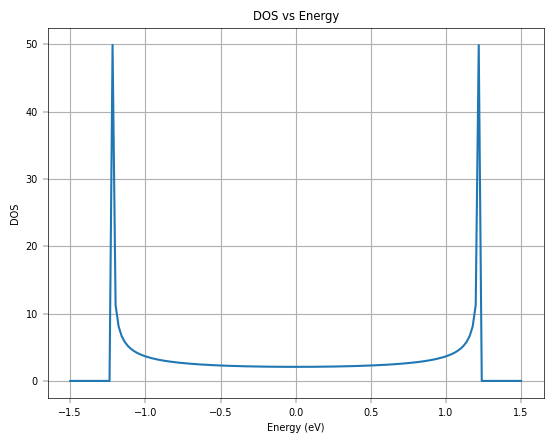

In [14]:
plt.plot(negf_out['uni_grid'], negf_out['DOS'][str(negf_out['k'][0])])
plt.xlabel('Energy (eV)')
plt.ylabel('DOS')
plt.title('DOS vs Energy')
plt.grid()
plt.show()

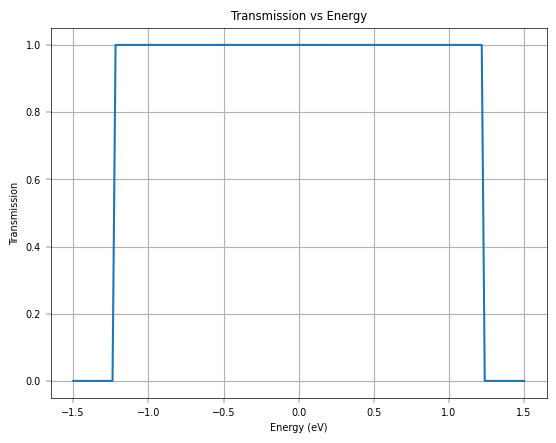

In [15]:
plt.plot(negf_out['uni_grid'], negf_out['T_avg'])
plt.xlabel('Energy (eV)')
plt.ylabel('Transmission')
plt.title('Transmission vs Energy')
plt.grid()
plt.show()